In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#生成数据
np.random.seed(seed=1) #固定随机数
X_min = 4 #X的下限
X_max = 30 #X的上限
X_n = 16 #data number
X = 5 + 25 * np.random.rand(X_n) #generate X
Prm_c = [170,108,0.2] #generate para
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n)

In [3]:
#storage data
np.savez('Ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

In [4]:
X

array([15.42555012, 23.00811234,  5.00285937, 12.55831432,  8.66889727,
        7.30846487,  9.65650528, 13.63901818, 14.91918686, 18.47041835,
       15.47986286, 22.13048751, 10.11130624, 26.95293591,  5.68468983,
       21.76168775])

In [5]:
np.round(X,2)

array([15.43, 23.01,  5.  , 12.56,  8.67,  7.31,  9.66, 13.64, 14.92,
       18.47, 15.48, 22.13, 10.11, 26.95,  5.68, 21.76])

In [6]:
np.round(T,2)

array([170.91, 160.68, 129.  , 159.7 , 155.46, 140.56, 153.65, 159.43,
       164.7 , 169.65, 160.71, 173.29, 159.31, 171.52, 138.96, 165.87])

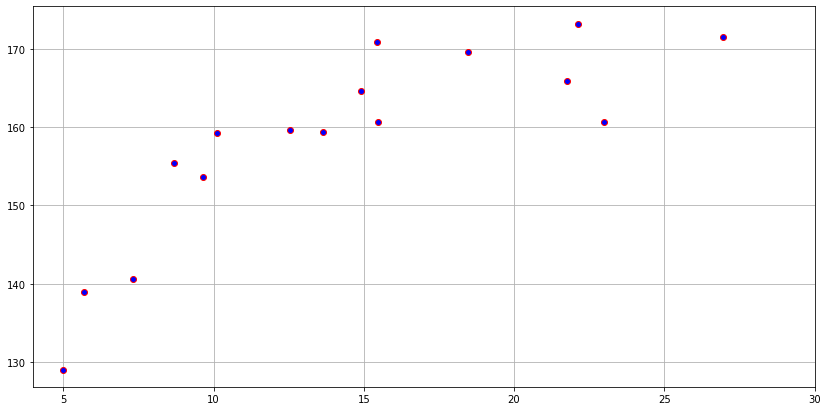

In [9]:
#data Viz
plt.figure(figsize=(14,7))
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='red',color='blue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [10]:
#MSE
from mpl_toolkits.mplot3d import Axes3D

In [11]:
#mse function
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    mse = np.mean((y-t)**2)
    return mse

In [12]:
#compution
xn = 100
w0 = np.linspace(-25,25,xn)
w1 = np.linspace(120,170,xn)
ww0,ww1 = np.meshgrid(w0,w1)
J = np.zeros((len(w0),len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1,i0] = mse_line(X,T,(w0[i0],w1[i1]))

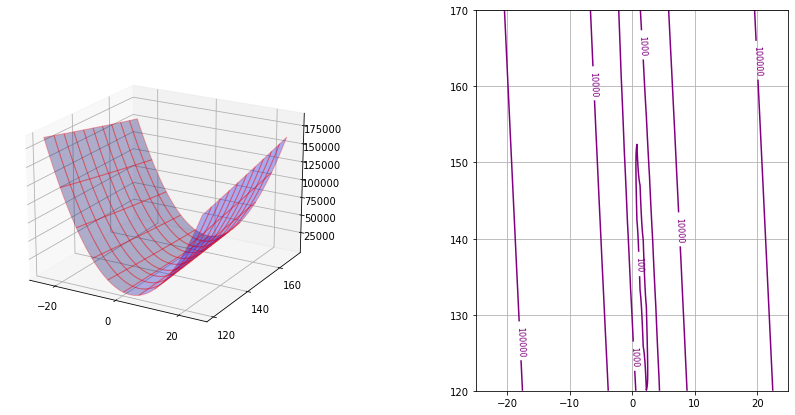

In [14]:
#data Viz
plt.figure(figsize=(14,7))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0,ww1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='red')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(ww0,ww1,J,30,colors='purple',levels=[100,1000,10000,100000])
cont.clabel(fmt='%d',fontsize=8)
plt.grid(True)
plt.show()

In [15]:
#mse 梯度
def dmse_line(x,t,w):
    y = w[0]*x + w[1]
    d_w0 = 2 * np.mean((y-t)*x)
    d_w1 = 2 * np.mean(y-t)
    return d_w0, d_w1

In [16]:
#test
d_w = dmse_line(X,T,[10,165])
np.round(d_w,1)

array([5046.3,  301.8])

In [17]:
#梯度法
def fit_line_num(x,t):
    w_init = [10.0,165.0] #init para
    alpha = 0.001 #lr
    tau_max = 100000 #重复最大次数
    eps = 0.1 #停止重复的梯度绝对值的阈值
    w_hist = np.zeros([tau_max,2])
    w_hist[0,:] = w_init
    for tau in range(1, tau_max):
        dmse = dmse_line(x,t,w_hist[tau-1])
        w_hist[tau,0] = w_hist[tau - 1, 0] - alpha * dmse[0]
        w_hist[tau,1] = w_hist[tau - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: #结束判断
            break
    
    w0 = w_hist[tau,0]
    w1 = w_hist[tau,1]
    w_hist = w_hist[:tau,:]
    return w0,w1,dmse,w_hist

重复次数13820
W=[1.539947,136.176160]
dMSE=[-0.005794,0.099991]
MSE=49.027452


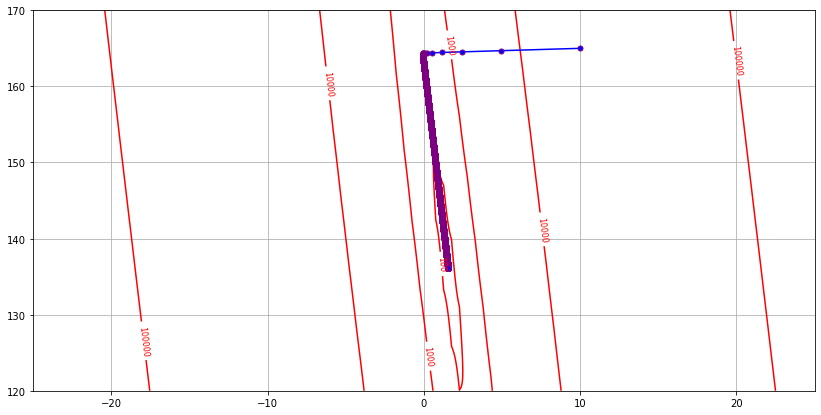

In [18]:
#main process
plt.figure(figsize=(14,7))
#显示MSE等高线
wn = 100 #等高线分辨率
w0 = np.linspace(-25,25,xn)
w1 = np.linspace(120,170,xn)
ww0,ww1 = np.meshgrid(w0,w1)
J = np.zeros((len(w0),len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        J[i1,i0] = mse_line(X,T,(w0[i0],w1[i1]))
cont = plt.contour(ww0,ww1,J,30,colors='red',levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
#调用梯度法
W0,W1,dMSE,W_history = fit_line_num(X,T)
#show final 
print('重复次数{0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0, W1])))

plt.plot(W_history[:,0],W_history[:,1],'.-',color='blue',markersize=10,markeredgecolor='purple')
plt.show()

In [19]:
#show line
def show_line(w):
    xb = np.linspace(X_min,X_max,100)
    y = w[0]*xb + w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)

w0=1.540
w1=136.176
SD=7.002cm


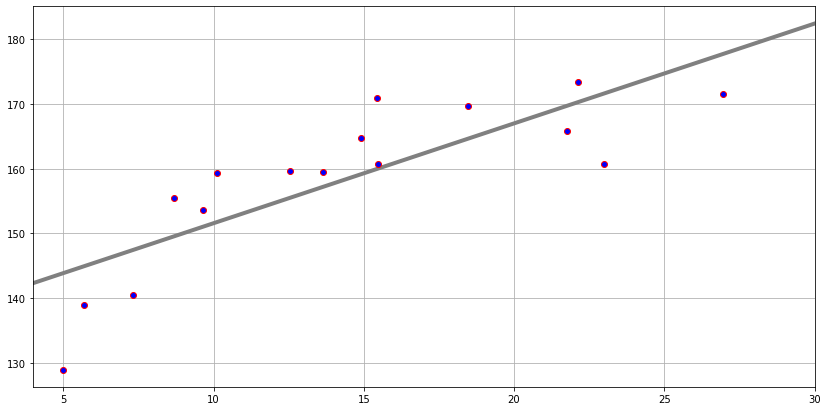

In [24]:
#main process
plt.figure(figsize=(14,7))
W=np.array([W0,W1])
mse = mse_line(X,T,W)
print('w0={0:.3f}\nw1={1:.3f}'.format(W0,W1))
print('SD={0:.3f}cm'.format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',color='blue',markeredgecolor='red')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [26]:
#求解析解
def fit_line(x,t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t*x)
    mxx = np.mean(x*x)
    w0 = (mtx - mt*mx) / (mxx - mx**2)
    w1 = mt - (w0*mx)
    return np.array([w0,w1])

w0=1.558
w1=135.872
SD=7.001cm


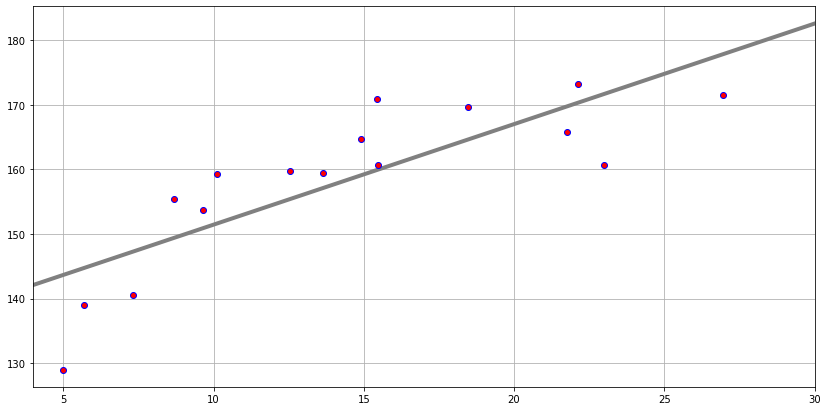

In [28]:
#main process
W = fit_line(X,T)
print('w0={0:.3f}\nw1={1:.3f}'.format(W[0],W[1]))
mse = mse_line(X,T,W)
print('SD={0:.3f}cm'.format(np.sqrt(mse)))

plt.figure(figsize=(14,7))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',color='red',markeredgecolor='blue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [29]:
#generate 2D data
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T/100)**2 + 2*np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [30]:
np.round(X0,2)

array([15.43, 23.01,  5.  , 12.56,  8.67,  7.31,  9.66, 13.64, 14.92,
       18.47, 15.48, 22.13, 10.11, 26.95,  5.68, 21.76])

In [31]:
np.round(X1,2)

array([70.43, 58.15, 37.22, 56.51, 57.32, 40.84, 57.79, 56.94, 63.03,
       65.69, 62.33, 64.95, 57.73, 66.89, 46.68, 61.08])

In [32]:
np.round(T,2)

array([170.91, 160.68, 129.  , 159.7 , 155.46, 140.56, 153.65, 159.43,
       164.7 , 169.65, 160.71, 173.29, 159.31, 171.52, 138.96, 165.87])

In [33]:
#2D data Viz
def show_data2(ax,x0,x1,t):
    for i in range(len(x0)):
        ax.plot([x0[i],x0[i]],[x1[i],x1[i]],[120,t[i]],color='blue')
    ax.plot(x0,x1,t,'o',color='red',markeredgewidth=0.5)
    ax.view_init(elev=35,azim=75)

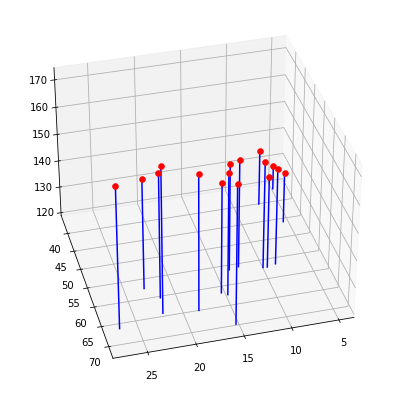

In [35]:
#main process
plt.figure(figsize=(28,7))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax,X0,X1,T)
plt.show()

In [36]:
#plane
def show_plane(ax,w):
    px0 = np.linspace(X0_min,X0_max,5)
    px1 = np.linspace(X1_min,X1_max,5)
    px0,px1 = np.meshgrid(px0,px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    ax.plot_surface(px0,px1,y,rstride=1,cstride=1,alpha=0.3,color='blue',edgecolor='red')

In [37]:
#plane mse
def mse_plane(x0,x1,t,w):
    y = w[0] * x0 + w[1]*x1 + w[2]
    mse = np.mean((y-t)**2)
    return mse

SD=12.88cm


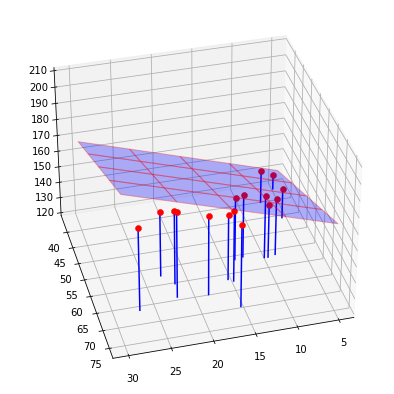

In [38]:
#main process
plt.figure(figsize=(14,7))
ax = plt.subplot(1,1,1,projection='3d')
W = [1.5,1,90]
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse = mse_plane(X0,X1,T,W)
print('SD={0:.2f}cm'.format(np.sqrt(mse)))
plt.show()

In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [44]:
#load data
outfile = np.load('Ch5_data.npz')
X, X_min, X_max, X_n, T = outfile['X'], 0, outfile['X_max'], outfile['X_n'], outfile['T']

In [45]:
#gauss function
def gauss(x,mu,s):
    return np.exp(-(x-mu)**2 / (2*s**2))

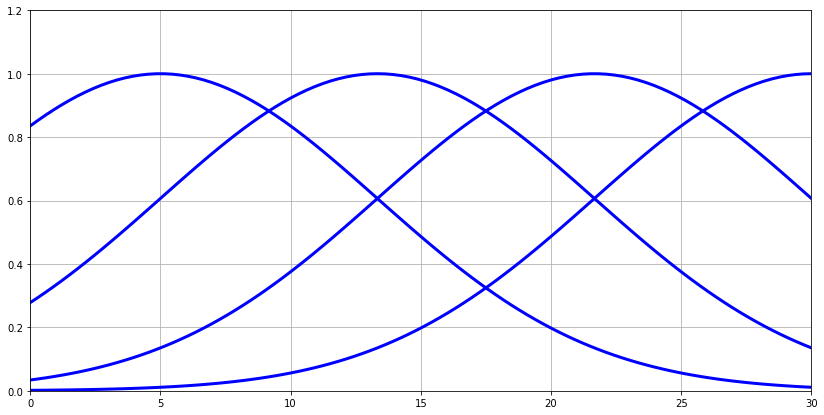

In [46]:
#main process
M = 4
plt.figure(figsize=(14,7))
mu = np.linspace(5,30,M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb,mu[j],s)
    plt.plot(xb,y,color='blue',linewidth=3)


plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()

In [47]:
#线性基底函数模型
def gauss_func(w,x):
    m = len(w) - 1
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)#创建和x大小相同、元素为0的矩阵y
    for j in range(m):
        y = y+w[j]*gauss(x,mu[j],s)
    y = y+w[m]
    return y

In [48]:
#mse
def mse_gauss_func(x,t,w):
    y = gauss_func(w,t)
    mse = np.mean((y-t)**2)
    return mse

In [49]:
#严密解
def fit_gauss_func(x,t,m):
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = np.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)
    phi_T = np.transpose(phi)
    
    b = np.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

In [50]:
#show
def show_gauss_func(w):
    xb = np.linspace(X_min,X_max,100)
    y = gauss_func(w,xb)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)

W=[29.4 75.7  2.9 98.3 54.9]
SD=104.17cm


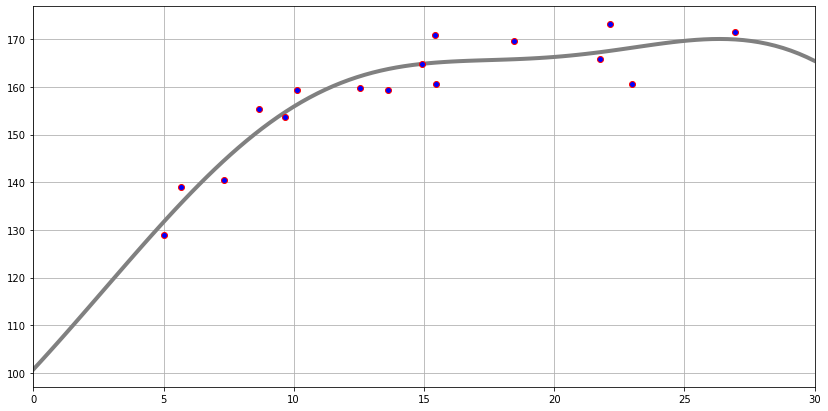

In [51]:
#main process
plt.figure(figsize=(14,7))
M=4
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',color='blue',markeredgecolor='red')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W=' + str(np.round(W,1)))
print('SD={0:.2f}cm'.format(np.sqrt(mse)))
plt.show()

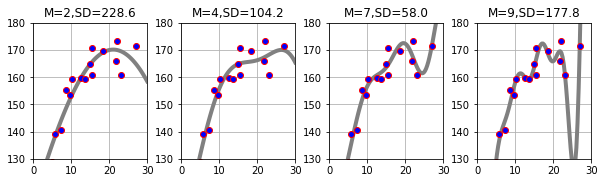

In [52]:
#更改参数看表现
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M=[2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W = fit_gauss_func(X,T,M[i])
    show_gauss_func(W)
    plt.plot(X,T,marker='o',linestyle='None',color='blue',markeredgecolor='red')
    plt.xlim(X_min,X_max)
    plt.ylim(130,180)
    plt.grid(True)
    mse = mse_gauss_func(X,T,W)
    
    plt.title('M={0:d},SD={1:.1f}'.format(M[i],np.sqrt(mse)))
plt.show()

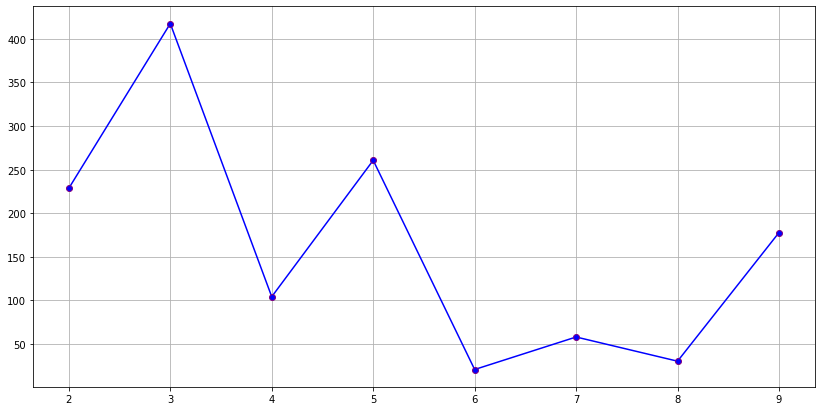

In [55]:
#看看mse变化情况
plt.figure(figsize=(14,7))
M = range(2,10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X,T,M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X,T,W))
plt.plot(M,mse2,marker='o',color='blue',markeredgecolor='purple')
plt.grid(True)
plt.show()

In [56]:
#切分训练集和测试集
X_test = X[:int(X_n/4)]
T_test = T[:int(X_n/4)]
X_train = X[int(X_n/4):]
T_train = T[int(X_n/4):]

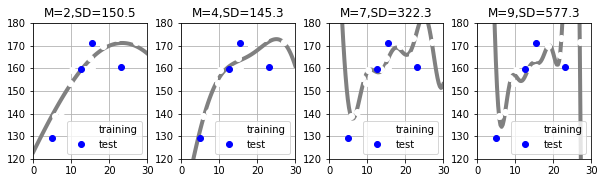

In [58]:
#main process
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M=[2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W = fit_gauss_func(X_train,T_train,M[i])
    show_gauss_func(W)
    plt.plot(X_train,T_train,marker='o',linestyle='None',color='white',label='training')
    plt.plot(X_test,T_test,marker='o',linestyle='None',color='blue',label='test')
    plt.legend(loc='lower right',fontsize=10,numpoints=1)
    plt.xlim(X_min,X_max)
    plt.ylim(120,180)
    plt.grid(True)
    mse = mse_gauss_func(X_test,T_test,W)
    plt.title('M={0:d},SD={1:.1f}'.format(M[i],np.sqrt(mse)))
plt.show()

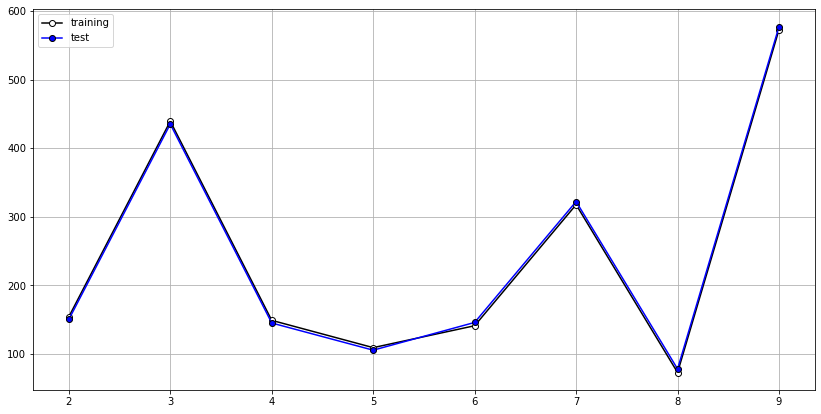

In [62]:
#mse
plt.figure(figsize=(14,7))
M=range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train,T_train,M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train,T_train,W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test,T_test,W))
plt.plot(M,mse_train,marker='o',linestyle='-',markerfacecolor='white',markeredgecolor='black',color='black',label='training')
plt.plot(M,mse_test,marker='o',linestyle='-',color='blue',markeredgecolor='black',label='test')
plt.legend(loc='upper left', fontsize=10)
#plt.ylim(0,12)
plt.grid(True)
plt.show()

In [64]:
#K-Fold
def kfold_gauss_func(x,t,m,k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0,k):
        x_train = x[np.fmod(range(n),k)!=i]
        t_train = t[np.fmod(range(n),k)!=i]
        x_test = x[np.fmod(range(n),k)==i]
        t_test = t[np.fmod(range(n),k)==i]
        wm = fit_gauss_func(x_train,t_train,m)
        mse_train[i] = mse_gauss_func(x_train,t_train,wm)
        mse_test[i] = mse_gauss_func(x_test,t_test,wm)
    return mse_train,mse_test

In [65]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [66]:
M = 4
K = 4
kfold_gauss_func(X,T,M,K)

(array([  4635.65363178, 153279.1798097 ,   2194.09165841,   2157.69986224]),
 array([  5281.0766643 , 155653.8214363 ,    995.83354744,   2829.80126533]))

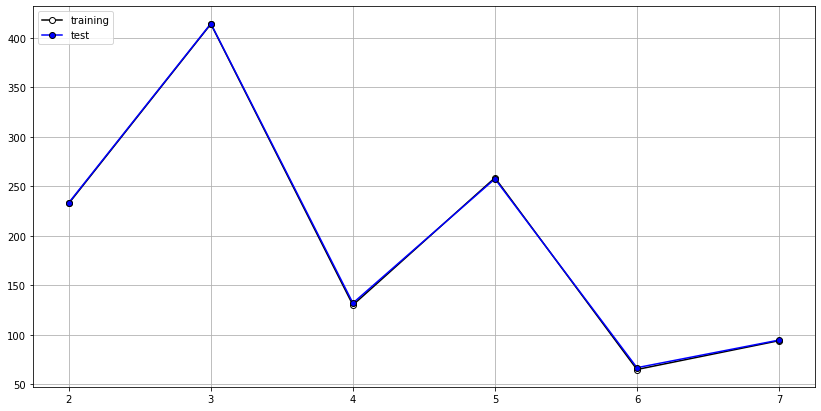

In [68]:
M = range(2,8)
K = 16
Cv_Gauss_train = np.zeros((K,len(M)))
Cv_Gauss_test = np.zeros((K,len(M)))
for i in range(0,len(M)):
    Cv_Gauss_train[:,i],Cv_Gauss_test[:,i]=kfold_gauss_func(X,T,M[i],K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train,axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test,axis=0))

plt.figure(figsize=(14,7))
plt.plot(M,mean_Gauss_train,marker='o',linestyle='-',color='k',markerfacecolor='w',label='training')
plt.plot(M,mean_Gauss_test,marker='o',linestyle='-',color='blue',markeredgecolor='black',label='test')
plt.legend(loc='upper left',fontsize=10)
#plt.ylim(0,20)
plt.grid(True)
plt.show()

SD=417.50cm


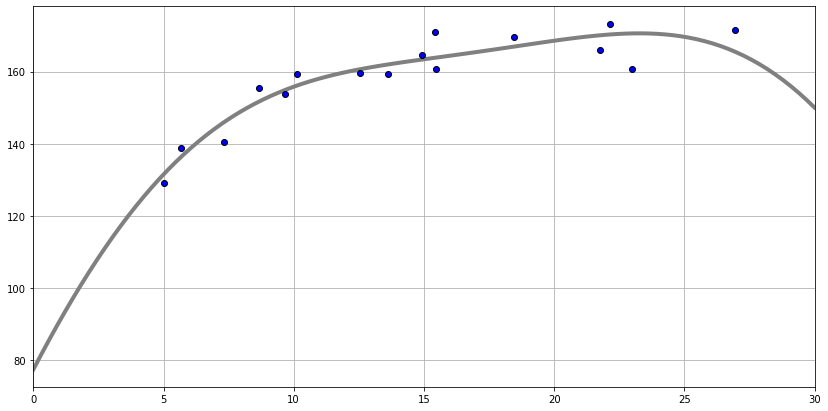

In [69]:
M = 3
plt.figure(figsize=(14,7))
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',color='blue',markeredgecolor='black')
plt.xlim([X_min,X_max])
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('SD={0:.2f}cm'.format(np.sqrt(mse)))
plt.show()

In [70]:
#select model
#Model
def model_A(x,w):
    y = w[0] - w[1]*np.exp(-w[2]*x)
    return y
#show modelA
def show_model_A(w):
    xb = np.linspace(X_min,X_max,100)
    y = model_A(xb,w)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)
#MSE of ModelA
def mse_model_A(w,x,t):
    y = model_A(x,w)
    mse = np.mean((y-t)**2)
    return mse

In [72]:
#最优化
from scipy.optimize import minimize

def fit_model_A(w_init,x,t):
    res1 = minimize(mse_model_A,w_init,args=(x,t),method='powell')
    return res1.x

w0=169.0
w1=113.7
w2=0.2
SD=3.86cm


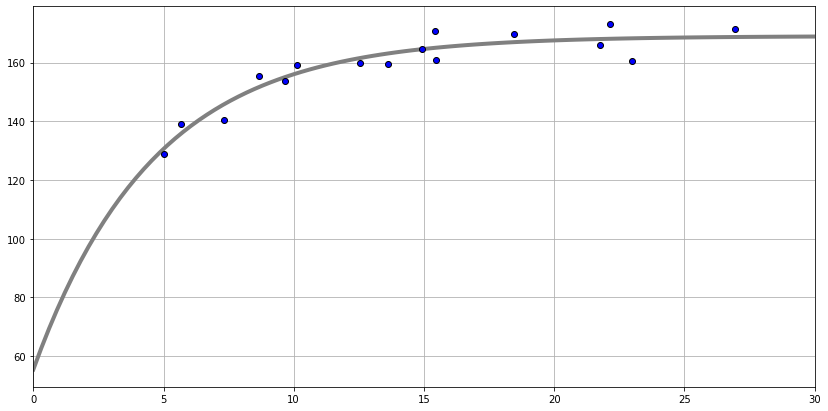

In [74]:
#main process
plt.figure(figsize=(14,7))
W_init=[100,0,0]
W = fit_model_A(W_init,X,T)
print('w0={0:.1f}\nw1={1:.1f}\nw2={2:.1f}'.format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X,T,marker='o',linestyle='None',color='blue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_model_A(W,X,T)
print('SD={0:.2f}cm'.format(np.sqrt(mse)))
plt.show()

In [75]:
#交叉验证ModelA
def kfold_model_A(x,t,k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0,k):
        x_train= x[np.fmod(range(n),k)!=i]
        t_train = t[np.fmod(range(n),k)!=i]
        x_test = x[np.fmod(range(n),k)==i]
        t_test = t[np.fmod(ranhe(n),k)==i]
        wm = fit_model_A(np.array([169,113,0.2]),x_train,t_train)
        mse_train[i] = mse_model_A(wm,x_train,t_train)
        mse_test[i] = mse_model_A(wm,x_test,t_test)
    return mse_train,mse_test

In [76]:
#main process
K = 16
Cv_A_train,Cv_A_test = kfold_model_A(X,T,K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print('Gauss(M=3) SD={0:.2f}cm'.format(mean_Gauss_test[1]))
print('Model A SD={0:.2f}cm'.format(mean_A_test))
M = range(6)
label = ['M=2','M=3','M=4','M=5','M=6','Model A']
plt.figure(figsize=(14,7))
plt.bar(M,SD,tick_label=label,align='center',facecolor='blue')
plt.show()

NameError: name 'ranhe' is not defined